## Setup
---


In [1]:
## Importing libraries and setting pandas display
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticks

import missingno as miss

import seaborn as sns
import numpy as np
import statsmodels.tsa.api as tsa
import datetime as dt
pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

In [2]:
## Loading in dataframe
df = pd.read_csv("Data/london_weather_MODIFIED - london_weather_MODIFIED (1).csv")
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


In [3]:
## Converting data column to datetime data type 
df["date"] = pd.to_datetime(df["date"], format = "%Y%m%d", errors = "coerce")
df["date"].head()

0   1979-01-01
1   1979-01-02
2   1979-01-03
3   1979-01-04
4   1979-01-05
Name: date, dtype: datetime64[ns]

In [4]:
## Setting the date column to be the index
df = df.set_index("date")
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


In [5]:
## Filtering
df_2000 = df.loc["2000": "2010"].copy()
df_2000 = df_2000.drop(columns = ["cloud_cover", "sunshine", "global_radiation", "pressure"])
df_2000.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.80,7.00,4.90,0.00,0.00
2000-01-02,11.50,7.90,5.00,0.20,0.00
2000-01-03,9.50,9.40,7.20,6.00,0.00
2000-01-04,11.00,7.00,4.40,0.20,0.00
2000-01-05,10.80,6.40,1.90,0.80,0.00


## Imputing Missing Values in Columns
---

In [6]:
## Checking for missing values
df_2000["max_temp"].isna().sum()

196

In [7]:
## Imputing missing valeus
df_2000["max_temp"] = df_2000["max_temp"].interpolate()
df_2000["max_temp"].isna().sum()

0

In [8]:
## Checking for missing values
df_2000["mean_temp"].isna().sum()

224

In [9]:
## Imputing missing valeus
df_2000["mean_temp"] = df_2000["mean_temp"].interpolate()
df_2000["mean_temp"].isna().sum()

0

In [10]:
## Checking for missing values
df_2000["min_temp"].isna().sum()

196

In [11]:
## Imputing missing valeus
df_2000["min_temp"] = df_2000["mean_temp"].interpolate()
df_2000["min_temp"].isna().sum()

0

In [12]:
## Checking for missing values
df_2000["precipitation"].isna().sum()

196

In [13]:
## Imputing missing valeus
df_2000["precipitation"] = df_2000["precipitation"].fillna(method = "bfill")
df_2000["precipitation"].isna().sum()

0

In [14]:
## Checking for missing values
df_2000["snow_depth"].isna().sum()

1049

In [15]:
## Imputing missing valeus
df_2000["snow_depth"] = df_2000["snow_depth"].fillna(method = "bfill")
df_2000["snow_depth"].isna().sum()

0

## Question One:
---
What month had the most precipitation between 2000 through 2010?

In [16]:
df_2000.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.80,7.00,7.00,0.00,0.00
2000-01-02,11.50,7.90,7.90,0.20,0.00
2000-01-03,9.50,9.40,9.40,6.00,0.00
2000-01-04,11.00,7.00,7.00,0.20,0.00
2000-01-05,10.80,6.40,6.40,0.80,0.00


In [17]:
## Resampling time series to a monthly basis
add_dictionary = {"max_temp" : "max", 
                  "mean_temp" : "mean", 
                  "min_temp" : "min",
                  "precipitation" : "max",
                  "snow_depth" : "median"
                 }
df_precipitation = df_2000.resample("MS").agg(add_dictionary).copy()
df_precipitation.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,12.90,5.61,0.50,6.00,0.00
2000-02-01,13.80,7.18,3.80,16.80,0.00
2000-03-01,16.60,8.49,4.30,7.20,0.00
2000-04-01,18.70,9.00,4.00,17.20,0.00
2000-05-01,26.60,13.80,9.70,19.00,0.00


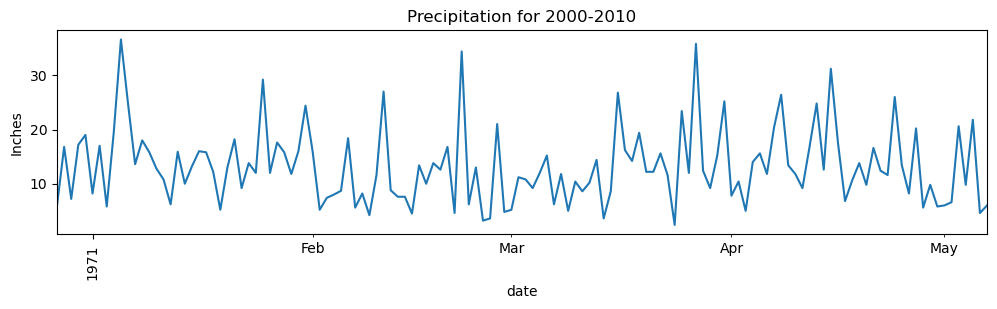

In [30]:
## Visualizing Monthly precipitation
loc_major_yr = mdates.YearLocator()
fmt_major_yr = mdates.DateFormatter("%Y")
loc_minor_m = mdates.MonthLocator(bymonth=[1,2,3,4,5,6,7,8,9,10,11,12])
fmt_minor_m = mdates.DateFormatter("%b")
fig, ax = plt.subplots(figsize=(12,3))
df_rainfall = df_precipitation["precipitation"].copy()
df_rainfall.plot(ax=ax, title = "Precipitation for 2000-2010", ylabel = "Inches");

ax.xaxis.set_major_locator(loc_major_yr)
ax.xaxis.set_major_formatter(fmt_major_yr)
ax.xaxis.set_minor_locator(loc_minor_m)
ax.xaxis.set_minor_formatter(fmt_minor_m)
fig.autofmt_xdate(which='major', rotation=90,ha='center')

In [20]:
## Finding the date with the highest percipitation
result_precipitation = df_precipitation["precipitation"].idxmax()
result_precipitation

Timestamp('2000-10-01 00:00:00', freq='MS')

In [21]:
## Finding the 
value_precipitation = df_precipitation["precipitation"].max()
value_precipitation

36.6

## Question Two:
---
Which year between 2000-2020 had the coolest average temperature?


In [22]:
## Resampling dataframe to a yearly frequency
df_temp = df_2000.resample("BYS").agg(add_dictionary).copy()
df_temp.head()

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
1999-01-01,11.50,7.45,7.00,0.20,0.00
2000-01-03,30.80,11.60,-2.20,36.60,0.00
2001-01-01,31.90,11.33,-0.90,18.00,0.00
2002-01-01,32.50,12.08,-0.80,29.20,0.00
2003-01-01,37.90,12.11,-1.40,27.00,0.00


In [ ]:
fig, ax = plt.subplots(figsize=(12,3))
df_precipitation["precipitation"].plot(ax=ax, title = "Precipitation for 2000-2010", ylabel = "Inches");